## Title:  Discussion on the ethical concerns of COMPASS

# Content of the document
 1. Problem Statement 
 2. Data Collection
 3. Data Preparation 
 4. Data Preprocessing   
 5. Model Assessement (Fairness) & optimization
 7. Conclusion
 8. References 

# 1. Problem Statement

We are investigating COMPAS, a popular commercial algorithm for predicting reoffending likelihoods (recidivism) for criminal defendants. There has been evidence that the algorithm is biased towards white defendants and against black inmates. Next, use a fairness approach to improve the model.

In order to accomplish this, I need first to explore the data and prepare it, then assess the fairness, then use one of the approaches to optimize it

Here are the steps I will take in this project: 
    
     1. Data Collection
     2. Data Exploration: This will be done to identify the most important features and combine them in new ways.
     3. Data Preprocessing: Lay out a pipeline of tasks for transforming data for use in my machine learning model.
     4. Model Assessment: Determine the type of descrimination.
     6. How to improve the fairness 
     7. Conclusion & recommendations     

# 2. Data Collection

In this step I do two things: 
    
  - Identify data sources
  - Split the data into training and test sets


Before starting, as a first step, I will call some libraries I need in order to build my model.


In [2]:
# Libraries 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
%matplotlib inline
import os
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings("ignore")
from sklearn.datasets import make_regression, make_classification, make_blobs
import sklearn.model_selection
import sklearn.linear_model

#### Source of the data: (kaggle.com, n.d.)

In [3]:
# Load the data from Kaggle Repository
initial_data = pd.read_csv('cox-violent-parsed.csv')

# Examine date structure and return the top 5 rows of the data frame.
initial_data.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In the table above, the date columns are displayed in object format

In [4]:
# Convert date columns from object format to time format

# attributes is the list of columns to be converted
attributes= ["in_custody","out_custody","v_screening_date","compas_screening_date", "dob","c_jail_in","c_jail_out","c_offense_date",
             "screening_date","vr_offense_date","r_jail_out","r_jail_in","r_offense_date","c_arrest_date"]

initial_data = pd.read_csv('cox-violent-parsed.csv',parse_dates=attributes)

# Create a copy of the original data
my_data = initial_data.copy()

# Examine my data structure and return the top 5 rows of the data frame.
my_data.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,334,961,0
2,3.0,michael ryan,michael,ryan,2014-12-31,Male,1985-06-02,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,2014-12-31,2014-12-30,2015-03-01,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-05-02,0,9,159,1
4,5.0,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0


In [5]:
#Check the type data of my attributes
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       11001 non-null  float64       
 1   name                     18316 non-null  object        
 2   first                    18316 non-null  object        
 3   last                     18316 non-null  object        
 4   compas_screening_date    18316 non-null  datetime64[ns]
 5   sex                      18316 non-null  object        
 6   dob                      18316 non-null  datetime64[ns]
 7   age                      18316 non-null  int64         
 8   age_cat                  18316 non-null  object        
 9   race                     18316 non-null  object        
 10  juv_fel_count            18316 non-null  int64         
 11  decile_score             18316 non-null  int64         
 12  juv_misd_count           18316 n

In [6]:
#Check if there are null values in my dataset
my_data_not_nut = my_data.isnull().sum()
#display non null data
my_data_not_nut[my_data_not_nut>0]

id                          7315
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_case_number                867
c_offense_date              3952
c_arrest_date              15231
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
r_case_number               9899
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date              9899
r_charge_desc              10039
r_jail_in                  11957
r_jail_out                 11957
violent_recid              18316
vr_case_number             16977
vr_charge_degree           16977
vr_offense_date            16977
vr_charge_desc             16977
score_text                    23
v_score_text                   6
in_custody                   594
out_custody                  594
dtype: int64

48% (25 from 51) of the attributes has null values!

The dataset I have has 52 attributes, to make my analysis more efficient I will drop the unecessary ones to my study

In [7]:
#List of the attributes I am keeping
needed_attributes = ["id","name","dob","compas_screening_date","c_offense_date","sex","age","age_cat","race","c_charge_degree","c_charge_desc", 
"days_b_screening_arrest", "decile_score", "is_recid","r_offense_date", "c_case_number","v_decile_score", 
"is_violent_recid","vr_offense_date","score_text"] 

#Copy my data in a new variable, to keep the original one untouched
analysis = my_data.loc[:,needed_attributes].copy()
analysis

,id,name,dob,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,decile_score,is_recid,r_offense_date,c_case_number,v_decile_score,is_violent_recid,vr_offense_date,score_text
0,1.0,miguel hernandez,1947-04-18,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
1,2.0,miguel hernandez,1947-04-18,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
2,3.0,michael ryan,1985-06-02,2014-12-31,NaT,Male,31,25 - 45,Caucasian,NaN,NaN,NaN,5,-1,NaT,NaN,2,0,NaT,Medium
3,4.0,kevon dixon,1982-01-22,2013-01-27,2013-01-26,Male,34,25 - 45,African-American,(F3),Felony Battery w/Prior Convict,-1.0,3,1,2013-05-07,13001275CF10A,1,1,2013-05-07,Low
4,5.0,ed philo,1991-05-14,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,1984-12-21,2014-12-29,2014-12-28,Female,31,25 - 45,African-American,(M1),Battery,-1.0,6,0,NaT,14018106MM10A,4,0,NaT,Medium
18312,NaN,winston gregory,1958-01-10,2014-01-14,2014-01-13,Male,57,Greater than 45,Other,(F2),Aggravated Battery / Pregnant,-1.0,1,0,NaT,14000581CF10A,1,0,NaT,Low
18313,NaN,farrah jean,1982-11-17,2014-09-03,2014-08-03,Female,33,25 - 45,African-American,(M1),Battery on Law Enforc Officer,-1.0,2,0,NaT,14003308CF10A,2,0,NaT,Low
18314,NaN,florencia sanmartin,1992-12-18,2014-06-30,2014-06-28,Female,23,Less than 25,Hispanic,(F3),Possession of Ethylone,-2.0,4,1,2015-03-15,14008895CF10A,4,0,NaT,Low


In [8]:
# Check if my dataset has any duplicates for the same name

analysis.duplicated().sum()
analysis[analysis.duplicated(["name","age","sex","race","dob"],keep=False)]

,id,name,dob,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,decile_score,is_recid,r_offense_date,c_case_number,v_decile_score,is_violent_recid,vr_offense_date,score_text
0,1.0,miguel hernandez,1947-04-18,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
1,2.0,miguel hernandez,1947-04-18,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
4,5.0,ed philo,1991-05-14,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
5,6.0,ed philo,1991-05-14,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
6,7.0,ed philo,1991-05-14,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18306,NaN,raheem smith,1995-06-28,2013-10-20,2013-10-19,Male,20,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,9,0,NaT,13014650CF10A,9,0,NaT,High
18307,NaN,raheem smith,1995-06-28,2013-10-20,2013-10-19,Male,20,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,9,0,NaT,13014650CF10A,9,0,NaT,High
18308,NaN,raheem smith,1995-06-28,2013-10-20,2013-10-19,Male,20,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,9,0,NaT,13014650CF10A,9,0,NaT,High
18314,NaN,florencia sanmartin,1992-12-18,2014-06-30,2014-06-28,Female,23,Less than 25,Hispanic,(F3),Possession of Ethylone,-2.0,4,1,2015-03-15,14008895CF10A,4,0,NaT,Low


The data has many multiple duplicates. 

In [9]:
# remove duplication of the same case, every case should be represented one time
analysis_ND=analysis.drop_duplicates(subset='c_case_number',keep='last')
analysis_ND

,id,name,dob,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,decile_score,is_recid,r_offense_date,c_case_number,v_decile_score,is_violent_recid,vr_offense_date,score_text
1,2.0,miguel hernandez,1947-04-18,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
3,4.0,kevon dixon,1982-01-22,2013-01-27,2013-01-26,Male,34,25 - 45,African-American,(F3),Felony Battery w/Prior Convict,-1.0,3,1,2013-05-07,13001275CF10A,1,1,2013-05-07,Low
8,9.0,ed philo,1991-05-14,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
9,10.0,marcu brown,1993-01-21,2013-01-13,2013-12-01,Male,23,Less than 25,African-American,(F3),Possession of Cannabis,NaN,8,0,NaT,13000570CF10A,6,0,NaT,High
10,11.0,bouthy pierrelouis,1973-01-22,2013-03-26,NaT,Male,43,25 - 45,Other,(F7),arrest case no charge,NaN,1,0,NaT,12014130CF10A,1,0,NaT,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,NaN,malcolm simmons,1993-03-25,2014-01-02,2014-01-31,Male,23,Less than 25,African-American,(F3),Leaving the Scene of Accident,-1.0,3,0,NaT,14001422CF10A,5,0,NaT,Low
18311,NaN,alexsandra beauchamps,1984-12-21,2014-12-29,2014-12-28,Female,31,25 - 45,African-American,(M1),Battery,-1.0,6,0,NaT,14018106MM10A,4,0,NaT,Medium
18312,NaN,winston gregory,1958-01-10,2014-01-14,2014-01-13,Male,57,Greater than 45,Other,(F2),Aggravated Battery / Pregnant,-1.0,1,0,NaT,14000581CF10A,1,0,NaT,Low
18313,NaN,farrah jean,1982-11-17,2014-09-03,2014-08-03,Female,33,25 - 45,African-American,(M1),Battery on Law Enforc Officer,-1.0,2,0,NaT,14003308CF10A,2,0,NaT,Low


after applying drop duplicate, 1123 Rows deleted from the dataset, now I have only 10310 case remaining 

My next step would be prepare my data for analysis

# 2. Preparing dataset for analysis

Before starting to prepare my data, I remove both the attributes name and dob 

In [10]:
# Drop the attributes name and dob because they will not impact my study 
analysis_ND = analysis_ND.drop("dob", axis=1)
analysis_ND = analysis_ND.drop("name", axis=1)
analysis_ND

,id,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,decile_score,is_recid,r_offense_date,c_case_number,v_decile_score,is_violent_recid,vr_offense_date,score_text
1,2.0,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
3,4.0,2013-01-27,2013-01-26,Male,34,25 - 45,African-American,(F3),Felony Battery w/Prior Convict,-1.0,3,1,2013-05-07,13001275CF10A,1,1,2013-05-07,Low
8,9.0,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
9,10.0,2013-01-13,2013-12-01,Male,23,Less than 25,African-American,(F3),Possession of Cannabis,NaN,8,0,NaT,13000570CF10A,6,0,NaT,High
10,11.0,2013-03-26,NaT,Male,43,25 - 45,Other,(F7),arrest case no charge,NaN,1,0,NaT,12014130CF10A,1,0,NaT,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,NaN,2014-01-02,2014-01-31,Male,23,Less than 25,African-American,(F3),Leaving the Scene of Accident,-1.0,3,0,NaT,14001422CF10A,5,0,NaT,Low
18311,NaN,2014-12-29,2014-12-28,Female,31,25 - 45,African-American,(M1),Battery,-1.0,6,0,NaT,14018106MM10A,4,0,NaT,Medium
18312,NaN,2014-01-14,2014-01-13,Male,57,Greater than 45,Other,(F2),Aggravated Battery / Pregnant,-1.0,1,0,NaT,14000581CF10A,1,0,NaT,Low
18313,NaN,2014-09-03,2014-08-03,Female,33,25 - 45,African-American,(M1),Battery on Law Enforc Officer,-1.0,2,0,NaT,14003308CF10A,2,0,NaT,Low


1. Keep only rows that has a case number and has an id 

In [11]:
# keep only rows with a case number 
analysis_ND = analysis_ND[analysis_ND["c_case_number"] != "NaN"]

In [12]:
# remove all rows with any NaN and NaT values
#analysis_ND =  analysis_ND.dropna()
analysis_ND = analysis_ND.dropna( how='any', subset=['id'])
analysis_ND 

,id,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,decile_score,is_recid,r_offense_date,c_case_number,v_decile_score,is_violent_recid,vr_offense_date,score_text
1,2.0,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,1,0,NaT,13011352CF10A,1,0,NaT,Low
3,4.0,2013-01-27,2013-01-26,Male,34,25 - 45,African-American,(F3),Felony Battery w/Prior Convict,-1.0,3,1,2013-05-07,13001275CF10A,1,1,2013-05-07,Low
8,9.0,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,4,1,2013-06-16,13005330CF10A,3,0,NaT,Low
9,10.0,2013-01-13,2013-12-01,Male,23,Less than 25,African-American,(F3),Possession of Cannabis,NaN,8,0,NaT,13000570CF10A,6,0,NaT,High
10,11.0,2013-03-26,NaT,Male,43,25 - 45,Other,(F7),arrest case no charge,NaN,1,0,NaT,12014130CF10A,1,0,NaT,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,10990.0,2013-03-18,2013-03-17,Male,34,25 - 45,African-American,(F3),Possession Of Alprazolam,-1.0,9,1,2013-05-20,13003878CF10A,4,1,2013-05-12,High
10992,10993.0,2013-03-22,2013-03-22,Male,23,Less than 25,African-American,(F3),"Poss3,4 Methylenedioxymethcath",0.0,9,0,NaT,13004155CF10A,9,0,NaT,High
10994,10995.0,2014-04-28,NaT,Female,31,25 - 45,African-American,(F1),arrest case no charge,-3.0,4,0,NaT,14005707CF10A,5,0,NaT,Low
10996,10997.0,2013-08-02,2013-07-02,Male,30,25 - 45,Hispanic,(F3),Poss Unlaw Issue Driver Licenc,0.0,2,1,2014-07-06,13001942CF10A,2,0,NaT,Low


2. I want explore how long people take to be charge for a crime and see if I can filter my selection for cases

In [13]:
#Check how long arrested people take to be charged for a crime
analysis_ND["days_b_screening_arrest"].describe()

count    5942.000000
mean       -0.120498
std        74.925514
min      -578.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max      1040.000000
Name: days_b_screening_arrest, dtype: float64

More than 75% have less than -1 and with -597 as minimum
to keep only quality data, we will limit my analysis on crimes charger within 30 days of arrest

In [14]:
# Keep only crimes charged within 30 days of arrest.
analysis_ND = analysis_ND.loc[(analysis_ND["days_b_screening_arrest"] > -30) & (analysis_ND["days_b_screening_arrest"] <30)]

3. Since my purpose is evalute Compass, I will remove all the cases that has the crime after the compass screening 

In [15]:
# Remove cases where the date of crime is after copmas screening
analysis_ND = analysis_ND[analysis_ND["c_offense_date"] < analysis_ND["compas_screening_date"]]

4. Now, I will create 3 groups: Age, Race and Score using CategoricalDtype

In [16]:
# Group 1: Age
grp_age = pd.CategoricalDtype(categories=["Less than 25","25 - 45","Greater than 45"],ordered=True)
analysis_ND["age_cat"] = analysis_ND["age_cat"].astype(grp_age)

# Group 2: Race
grp_race = pd.CategoricalDtype(categories=['African-American','Caucasian','Hispanic',"Other",'Asian',
'Native American'],ordered=True)
analysis_ND["race"] = analysis_ND["race"].astype(grp_race)

# Group 3: Score
grp_score = pd.CategoricalDtype(categories=["Low","Medium","High"],ordered=True)
analysis_ND["score_text"] = analysis_ND["score_text"].astype(grp_score)

In [17]:
#convert the attributes between "Sex" and "c_charge_degree" to categories with the function astype

for att in ["sex","c_charge_degree"]:
    analysis_ND[att] = analysis_ND[att].astype("category")

5. Remove all the rows that has empty value for the attribute score_text

In [18]:
#remove rows with score text equals NaN 
analysis_ND = analysis_ND[analysis_ND["score_text"] != "NaN"]

In [19]:
#I will not consider traffic tickets & munipal violations as repeated offense (charge degree equals O)
#analysis_ND = analysis_ND[analysis_ND["c_charge_degree"] != "O"]


6. I want to know since when the Compass screening happened for both ordinary and violent offenses (I call both variables 2y_r and 2y_v), to do  that I first substract
the columns of time, then I assign 3 different values for every case:  
    - 0: the offender didnot commit any crime since 1st arrest 
    - 1: the offender committed a new crime in less than 2 years
    - 2: the offender committed a new crime after 2 years    

In [20]:
# I will call my function nbr_offenses
def nbr_offenses(att,recid):
   
    # Subtract the columns of time
    analysis_ND["days"] = analysis_ND[att] - analysis_ND["compas_screening_date"]
    
    # Convert the output to an integer by using the .days parameter  
    analysis_ND["days"] = analysis_ND["days"].apply(lambda x:x.days)
    
    # Assign the values 0, 1 and 2 
    analysis_ND["offence"] = np.where(analysis_ND[recid]==0,0,
                np.where((analysis_ND[recid]==1) & (analysis_ND["days"] < 730),1,2))
    
    return analysis_ND["offence"]



In [21]:
# calcualte both 2y_r and 2y_v
analysis_ND["2y_r"] = nbr_offenses("r_offense_date","is_recid")
analysis_ND["2y_v"] = nbr_offenses("vr_offense_date","is_violent_recid")

7. I want to foucs only on offenders who didnot or did repeat crime in less then 2 years, so I will remove Offenders who has 2y_r and 2y_v equals 2

In [22]:
# remove offenders who committed new ordinary crimes after 2 years
analysis_nd_r = analysis_ND[analysis_ND["2y_r"] !=2].copy()

# remove offenders who committed new violent crimes after 2 years
analysis_nd_v = analysis_ND[analysis_ND["2y_v"] != 2].copy()

In [23]:
# reset the index to  make it easier for me to work with the dataset 
analysis_nd_r.reset_index(drop=True,inplace=True)
analysis_nd_v.reset_index(drop=True,inplace=True)

8. In order to make data extraction easier, I add another 2 new attributes:
    - <b>Attribute 1 :</b> devide cases in 2 categories based on the score using binary values,
    so if the score >5, the case category will be 1, if the score is lower than 5 the case category will be 0
    - <b>Attribute 2 :</b> This attribute will help me know if the prediction of Compass was correct or wrong,
        so if it is "True", the prediction of Compass was correct, if "False" the prediction was wrong

In [24]:
#Attribute 1: grouping cases in 2 categories (high score (>=5 and low score <5))
analysis_nd_r["binary_score"] = np.where(analysis_nd_r["decile_score"] >=5,1,0)
analysis_nd_v["binary_v_score"] = np.where(analysis_nd_v["v_decile_score"] >=5,1,0)

In [25]:
# Attribute 2: if the prediction is correct return True,else return false

# For ordinary offense
analysis_nd_r["prediction_recid"] = analysis_nd_r['is_recid'] == analysis_nd_r["binary_score"]

# For violent offense
analysis_nd_v["prediction_vrecid"] = analysis_nd_v['is_violent_recid'] == analysis_nd_v["binary_v_score"]

In [26]:
# Index reset 
analysis_nd_r.reset_index(drop=True,inplace=True)
analysis_nd_v.reset_index(drop=True,inplace=True)

In [27]:
#Checking the new values
analysis_nd_r.head(3)

,id,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,...,v_decile_score,is_violent_recid,vr_offense_date,score_text,days,offence,2y_r,2y_v,binary_score,prediction_recid
0,2.0,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,...,1,0,NaT,Low,NaN,0,0,0,0,True
1,4.0,2013-01-27,2013-01-26,Male,34,25 - 45,African-American,(F3),Felony Battery w/Prior Convict,-1.0,...,1,1,2013-05-07,Low,100.0,1,1,1,0,False
2,9.0,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,...,3,0,NaT,Low,NaN,0,1,0,0,False


In [28]:
analysis_nd_v.head(3)

,id,compas_screening_date,c_offense_date,sex,age,age_cat,race,c_charge_degree,c_charge_desc,days_b_screening_arrest,...,v_decile_score,is_violent_recid,vr_offense_date,score_text,days,offence,2y_r,2y_v,binary_v_score,prediction_vrecid
0,2.0,2013-08-14,2013-08-13,Male,69,Greater than 45,Other,(F3),Aggravated Assault w/Firearm,-1.0,...,1,0,NaT,Low,NaN,0,0,0,0,True
1,4.0,2013-01-27,2013-01-26,Male,34,25 - 45,African-American,(F3),Felony Battery w/Prior Convict,-1.0,...,1,1,2013-05-07,Low,100.0,1,1,1,0,False
2,9.0,2013-04-14,2013-04-13,Male,24,Less than 25,African-American,(F3),Possession of Cocaine,-1.0,...,3,0,NaT,Low,NaN,0,1,0,0,True


#### Now my data is ready for the exporatory analysis

# 3. Data Exploration
In this step, I will be exploring my data to understand more about: the relationship between the crime, race, gender, age and the frequent commited crimes

In [29]:
# check data
analysis_nd_r.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3527.0,5511.070031,3171.661078,2.0,2703.0,5531.0,8284.0,10998.0
age,3527.0,34.908704,12.090702,18.0,25.0,32.0,42.0,96.0
days_b_screening_arrest,3527.0,-1.666005,4.413039,-29.0,-1.0,-1.0,-1.0,29.0
decile_score,3527.0,4.199036,2.843142,-1.0,2.0,4.0,6.0,10.0
is_recid,3527.0,0.322937,0.467665,0.0,0.0,0.0,1.0,1.0
v_decile_score,3527.0,3.442586,2.444397,-1.0,1.0,3.0,5.0,10.0
is_violent_recid,3527.0,0.074568,0.262730,0.0,0.0,0.0,0.0,1.0
days,263.0,314.019011,250.267909,-218.0,123.5,295.0,489.0,1046.0
offence,3527.0,0.078537,0.283426,0.0,0.0,0.0,0.0,2.0
2y_r,3527.0,0.322937,0.467665,0.0,0.0,0.0,1.0,1.0


As shown in  the table above, from the ordinary 3527 cases: 
   - 75% of the cases assessed by compass got score 6
   - 75% of the offenders are above 42 years old where 32% are recidivists and 7 % are violent recidivist

In [30]:
analysis_nd_r.describe(include=["object","category"]).T

,count,unique,top,freq
sex,3527,2,Male,2791
age_cat,3527,3,25 - 45,1978
race,3527,6,African-American,1725
c_charge_degree,3527,12,(F3),1907
c_charge_desc,3526,321,Battery,737
c_case_number,3527,3527,13011352CF10A,1
score_text,3523,3,Low,2075


From the table above, we notice:
 - One of the most common cases is Battery with charge degree F3 with the main race African Americans      
 - TMost reported cases are from males aging between 25 and 45 

<b> After cleaning data, and preparing it, now I will apply SVM to classify it

## 3.1 Explore Race

 {change me}
  - th race, when looking at the statistics, we must always keep in mind that there is very little data on Asians and Native Americans (a good idea would be to group them together with Other in a single category to make it more representative).

 - In general, we realize that almost 50% of the cases belong to African Americans and they are also the ones with the highest percentage of recidivism (almost 40% of the cases are African American).

 - This is important because the dataset is not balanced and can be very biased due to the predominance of this ethnic group.

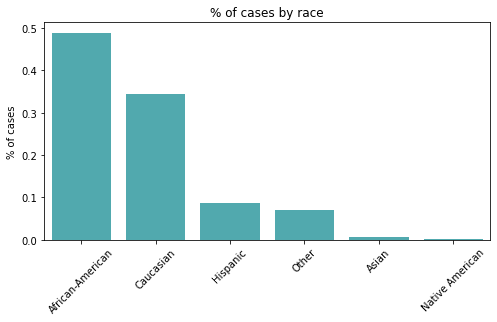

In [31]:
race_g = analysis_nd_r["race"].value_counts(normalize=True,ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x=race_g["index"],y=race_g["race"],color='#42b7bd')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("% of cases")
plt.title("% of cases by race")
plt.show(block=False)

 - 50% of the cases belong to African-Americans, 35% to Caucasian, and the rest is below 1%   

In [32]:
analysis_nd_r.groupby("race",as_index=False)["2y_r"].mean().style.background_gradient(cmap='Reds',axis=0)

,race,2y_r
0,African-American,0.385507
1,Caucasian,0.279376
2,Hispanic,0.231270
3,Other,0.240816
4,Asian,0.173913
5,Native American,0.000000


 - For Recidivism rate, 39 % of African Americans are recidivist and for Caucasian 28% 

In [33]:
##Obtain percentages by rows with normalize
pd.crosstab(analysis_nd_r["race"],analysis_nd_r["age_cat"],normalize=0).style.background_gradient(cmap='Oranges',axis=1)

age_cat,Less than 25,25 - 45,Greater than 45
race,,,
African-American,0.267826,0.572174,0.160000
Caucasian,0.156943,0.548069,0.294988
Hispanic,0.198697,0.540717,0.260586
Other,0.220408,0.567347,0.212245
Asian,0.217391,0.565217,0.217391
Native American,0.100000,0.600000,0.300000


- From the table above, we notice that the predominant age for the different races is between 25 and 45

## 3.2 Explore link between sex and age

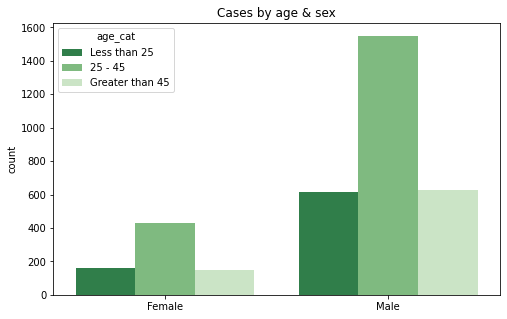

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=analysis_nd_r,x="sex",hue="age_cat",palette="Greens_r")
plt.title("Cases by age & sex")
plt.xlabel("")
plt.show(block=False)

Females are secondary compared to males

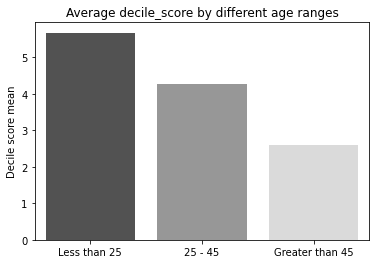

In [35]:
decile_mean_age = analysis_nd_r.groupby("age_cat")["decile_score"].mean().reset_index()
sns.barplot(data=decile_mean_age,x="age_cat",y="decile_score",palette="Greys_r")
plt.ylabel("Decile score mean")
plt.xlabel("")
plt.title("Average decile_score by different age ranges")
plt.show(block=False)

- There is a correlation between age and decile score, the younger the person, the more penalized is.

## 3.3 Type of crime per sex (gender)

I focus, because of their great variety, only on the 10 most typical.
Many could be grouped by type of crime (drugs, vehicle, robbery and assault...) to facilitate the study of the data.

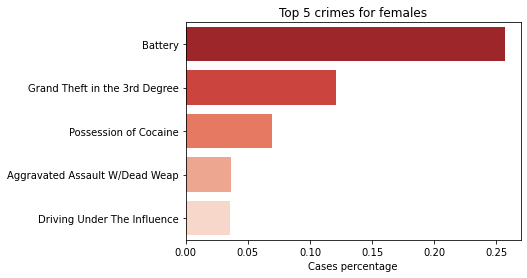

In [36]:
#Top 5 crimes for women
female_crime = analysis_nd_r[analysis_nd_r["sex"]=="Female"]["c_charge_desc"].value_counts(normalize=True,ascending=False)[:5].reset_index()
sns.barplot(data=female_crime,x="c_charge_desc",y="index",palette="Reds_r")
plt.title("Top 5 crimes for females")
plt.ylabel("")
plt.xlabel("Cases percentage")
plt.show(block=False)

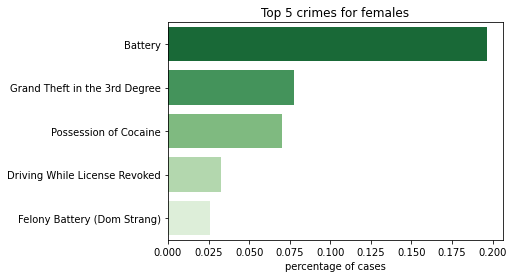

In [37]:
#Top 5 crimes for men
male_crime= analysis_nd_r[analysis_nd_r["sex"]=="Male"]["c_charge_desc"].value_counts(normalize=True,ascending=False)[:5].reset_index()

sns.barplot(data=male_crime,x="c_charge_desc",y="index",palette="Greens_r")
plt.title("Top 5 crimes for females")
plt.ylabel("")
plt.xlabel("percentage of cases")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

 Men and women commit the same top 3 offenses

## 3.4 Top offenses by both race and sex

In [38]:
# Here I only consider the top 5 cases by counting their valuses then filtering with the function isin
top_5_cases = analysis_nd_r["c_charge_desc"].value_counts()[:5].index.tolist()
top_cases = analysis_nd_r[analysis_nd_r["c_charge_desc"].isin(top_5_cases)]

Lets explore in more depth top crimes by race

In [39]:
pd.crosstab(index=top_cases["c_charge_desc"],columns=top_cases["race"],normalize=1)\
    .style.background_gradient(cmap='Reds',axis=0)

race,African-American,Caucasian,Hispanic,Other,Asian,Native American
c_charge_desc,,,,,,
Battery,0.422006,0.562500,0.538462,0.658537,0.750000,0.666667
Driving While License Revoked,0.094708,0.040323,0.059829,0.040650,0.083333,0.000000
Felony Battery (Dom Strang),0.050139,0.044355,0.094017,0.065041,0.000000,0.333333
Grand Theft in the 3rd Degree,0.245125,0.165323,0.213675,0.186992,0.000000,0.000000
Possession of Cocaine,0.188022,0.187500,0.094017,0.048780,0.166667,0.000000


- We already saw from the previous sections, Battery is top committed crime, but what we know more now is that its is taking the highest % for the different races. 
- For the top cases, we still have the sames result. 
- The exception we see that both Asian and Native American don't have any crimes on the category Driving while Licesne revoked and also no Grand Theft.  

In [40]:
# Recidivism % between race and the type of the case 
pd.pivot_table(data=top_cases,values="2y_r",index="c_charge_desc",columns="race",fill_value=0)\
    .style.background_gradient(cmap='Oranges',axis=1)

race,African-American,Caucasian,Hispanic,Other,Asian,Native American
c_charge_desc,,,,,,
Battery,0.316832,0.243728,0.174603,0.160494,0.111111,0
Driving While License Revoked,0.485294,0.500000,0.285714,0.200000,0.000000,0
Felony Battery (Dom Strang),0.222222,0.272727,0.363636,0.125000,0.000000,0
Grand Theft in the 3rd Degree,0.306818,0.329268,0.200000,0.217391,0.000000,0
Possession of Cocaine,0.488889,0.376344,0.181818,0.500000,0.500000,0


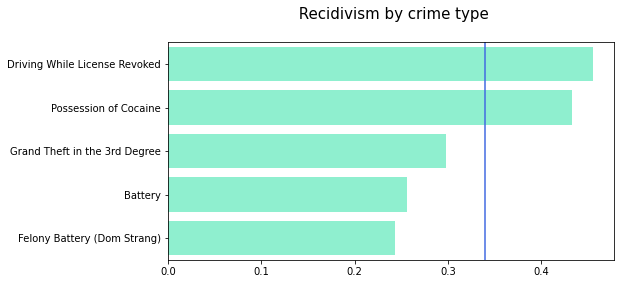

In [41]:
# % of recidivism by crime type
percentage_recid_cases= top_cases.groupby("c_charge_desc")["2y_r"].mean().reset_index().sort_values(by="2y_r",ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=percentage_recid_cases,y="c_charge_desc",x="2y_r", color="#7FFFD4")
plt.title(" Recidivism by crime type\n",fontsize=15)
plt.xlabel("")
plt.ylabel("")
plt.axvline(x=0.34,color="#4169E1")
plt.show(block=False)

## 4. Check the fairness of the model & how to improve it
 - I will compare both ordinary & violent offences and see wich one has better accuracy using logisitc linear 
 - I will also see the result by both race and sex

In [42]:
# first I will calcualte TPR, FPR, FNR, TNR for normal offences
from sklearn.metrics import classification_report
print(classification_report(analysis_nd_r['2y_r'],analysis_nd_r["binary_score"]))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      2388
           1       0.48      0.61      0.53      1139

    accuracy                           0.66      3527
   macro avg       0.63      0.65      0.63      3527
weighted avg       0.69      0.66      0.67      3527



In [43]:
# calcualte TPR, FPR, FNR, TNR for normal offences
cross_tab = pd.crosstab(analysis_nd_r["binary_score"],analysis_nd_r['2y_r'],normalize="columns").style.background_gradient(cmap='Reds',axis=1)
cross_tab

2y_r,0,1
binary_score,,
0,0.683417,0.392450
1,0.316583,0.607550


- This model has an accuray of 66%
- Of the actual positive cases it predicted 61% where it is correct in 48% of the cases => False Positive Rate : 1-0.68 = 0.32 
- Of the actual negative cases, the model predicted 68% of the cases where it was correct for the 78% cases 
  => False Negative Rate 1-0.61=0.39

Now I check the prediction for violent crimes

In [44]:
# analysis_nd_v only cases with violent crimes
pd.crosstab(analysis_nd_v["binary_v_score"],analysis_nd_v['2y_v'],normalize="columns").style.background_gradient(cmap='Greens',axis=1)

2y_v,0,1
binary_v_score,,
0,0.717326,0.469880
1,0.282674,0.530120


In [45]:
print(classification_report(analysis_nd_v['2y_v'],analysis_nd_v["binary_v_score"]))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      3336
           1       0.12      0.53      0.20       249

    accuracy                           0.70      3585
   macro avg       0.54      0.62      0.51      3585
weighted avg       0.90      0.70      0.78      3585



The prediction here is worse than the previous one even though the accuracy shows a higher score,
as we see, the prediction for positive cases is higher compared to the previous one (18% more) 

In [46]:
analysis_nd_v['2y_v'].value_counts(normalize=True)

0    0.930544
1    0.069456
Name: 2y_v, dtype: float64

In [47]:
analysis_nd_r["2y_r"].value_counts(normalize=True)

0    0.677063
1    0.322937
Name: 2y_r, dtype: float64

- Despite the accuracy being higher (0.70 > 0.66) 
- In case of violent crimes, the model is less accurate for positive cases (diffirence 18% higher) 
- False Positive Rate : 0.46
- False Negative Rate:  0.28

Conclusion, it shows more accuracy with less accurate predicition for positive cases 

## 4.1 Check Descrimination of COMPASS for both the race and sex

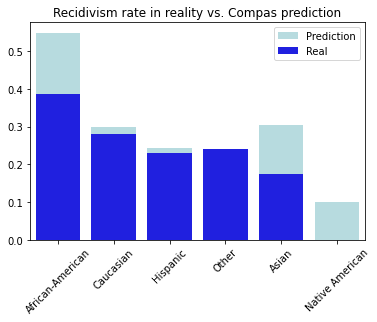

In [48]:
# Comparaison between Revidivism &  Compas forcast
reality = analysis_nd_r.groupby("race",as_index=False)["2y_r"].mean()
compas_prediction = analysis_nd_r.groupby("race")["binary_score"].mean().reset_index()

sns.barplot(data=compas_prediction,x="race",y="binary_score",color="powderblue",label="Prediction")

ax= sns.barplot(data=reality,x="race",y="2y_r",color="blue",label="Real")

plt.title("Recidivism rate in reality vs. Compas prediction")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show(block=False)

Comparing the reality with the system COMPASS, shows hi less accuray for false positive prediction where the highest % goes for Afriacan american followed by Asians and Native Americans 

In [49]:
analysis_nd_r.groupby("race").agg({"2y_r":"mean",
                                    "binary_score":"mean"}).style.background_gradient(cmap='Greens',axis=1)

,2y_r,binary_score
race,,
African-American,0.385507,0.548986
Caucasian,0.279376,0.299918
Hispanic,0.231270,0.244300
Other,0.240816,0.216327
Asian,0.173913,0.304348
Native American,0.000000,0.100000


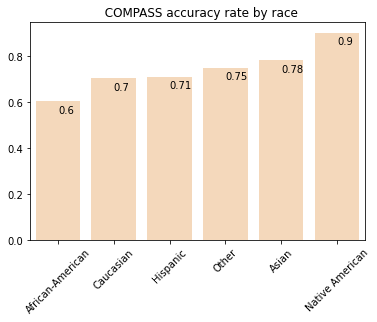

In [50]:
race_acc = analysis_nd_r.groupby("race")["prediction_recid"].mean().reset_index()
ax= sns.barplot(data=race_acc,x="race",y="prediction_recid",color="#FED8B1")
plt.title("  COMPASS accuracy rate by race")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("")
for num,text in zip(range(6),round(race_acc["prediction_recid"],2)):
    ax.text(num,text-0.05,text)

In [51]:
# Recidivism by gender
prediction_sex = analysis_nd_r.groupby("sex")["binary_score"].mean()
recidivism_sex = analysis_nd_r.groupby("sex")["2y_r"].mean()
comparacion_sex = analysis_nd_r.groupby("sex")["prediction_recid"].mean()

dt_comp_sex_recidivism = pd.concat([prediction_sex,recidivism_sex,comparacion_sex],axis=1).reset_index()
dt_comp_sex_recidivism.columns = ["sex","decile_score","2y_r","accuracy"]
dt_comp_sex_recidivism.round(2).style.background_gradient(cmap='Greens',axis=1)

,sex,decile_score,2y_r,accuracy
0,Female,0.360000,0.210000,0.660000
1,Male,0.420000,0.350000,0.660000


<b>If we look into sex, in real world males are more recidivists than females and we see same in compass. 

# 4.2 Percentage of false positives and negative positives

In [52]:
# Create 2 attributes one for the name and one for the result
def wrong_prediction(att):
    # Build 2 lists one for the FPR and one for FNR
    list_att = []
    FPR = []
    FNR = []
    for x in analysis_nd_r[att].unique().tolist():    
        #Filter by race or gender
        data = analysis_nd_r[analysis_nd_r[att]==x] 
        # create sorting report (with output_dict we return a dictionary)   
        classif_race = classification_report(data['2y_r'],data["binary_score"],output_dict=True)
        list_att.append(x)
        # False Positive Rate is 1-exahusivity(recall)
        false_positive = 1 - classif_race.get("0")["recall"]
        FPR.append(false_positive)
        # False Negative Rate 1-TPR
        false_negative = 1 - classif_race.get("1")["recall"]
        FNR.append(false_negative)
    # creamos dataframe
    df_fpr = pd.DataFrame({x:list_att,"FPR":FPR,"FNR":FNR})
    return df_fpr

In [53]:
wrong_prediction("race").style.background_gradient(cmap='Oranges',axis=1)

,Native American,FPR,FNR
0,Other,0.150538,0.576271
1,African-American,0.455660,0.302256
2,Caucasian,0.220068,0.494118
3,Hispanic,0.199153,0.605634
4,Asian,0.210526,0.250000
5,Native American,0.100000,1.000000


We can see clearly in the table above, that the African- American has the highest % of False positive rate compared to the rest of races. 
=> <b> This shows clearly the mistreat discrimination 

In [55]:
wrong_prediction("sex").style.background_gradient(cmap='Blues',axis=1)

,Female,FPR,FNR
0,Male,0.317829,0.383756
1,Female,0.312715,0.448052


For Gender, Recidivism is same for both gender.  

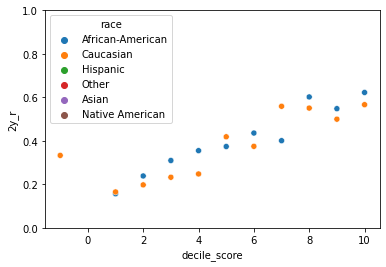

In [56]:
d = analysis_nd_r.groupby(["decile_score","race"]).agg({"2y_r":"mean"}).reset_index()
d = d[d["race"].isin(["African-American","Caucasian"])]
im = sns.scatterplot(data=d,x="decile_score",y="2y_r",hue="race")
im.set(ylim=(0,1))
plt.show(block=False)

# 4.SUMMARY
1. Compas evaluates by race and gender; there are some differences in results, but we must not forget that one of the races has the highest prevalence (nearly 50%) and they are also the most likely to recidivate (nearly 40%).
2. Adding the two_year_r feature based on compas report was for the purpose to see if adding this feature will help to narrow the prediction coming from COMPASS 
3. We saw that is_violent_racid got better compard to is_recid but no improvement on Positive cases prediction it became worse. 
My suggestion, is to remove the race from the full data and train the model in a way that it will be always independant from the race. In that way the discrimination will be avoided, maybe not fully but at least it would be better.   

# 9.References

kaggle.com. (n.d.). Compas: thoroughly investigating the controversial. [online] Available at: https://www.kaggle.com/code/gonzalogarciafuste/compas-thoroughly-investigating-the-controversial/data [Accessed 25 OCt. 2022].